In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [5]:
all_file= glob.glob("./songData/*.xlsx")
len(all_file)

21

In [6]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[-1][9:])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
# data = pd.concat(data)
# pd.DataFrame(data)
# data = data.sample(frac = 1)
print(names)
print(count)
print(clusters)
print(len(data))

['songType0.xlsx', 'songType1.xlsx', 'songType10.xlsx', 'songType11.xlsx', 'songType12.xlsx', 'songType13.xlsx', 'songType14.xlsx', 'songType15.xlsx', 'songType16.xlsx', 'songType17.xlsx', 'songType18.xlsx', 'songType19.xlsx', 'songType2.xlsx', 'songType20.xlsx', 'songType3.xlsx', 'songType4.xlsx', 'songType5.xlsx', 'songType6.xlsx', 'songType7.xlsx', 'songType8.xlsx', 'songType9.xlsx']
[8, 1027, 43, 62, 127, 711, 58, 2, 5, 780, 11, 46, 13, 9, 762, 8, 58, 92, 207, 19, 57]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 3, 4, 5, 6, 7, 8, 9]
21


In [7]:
# import stemmer

from operator import index


valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set('')
stop_words_file_lines=open('stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = set()
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                # print('eta valid char list e nai ',each_char)
                if unique_words_per_sentence not in stop_words:
                    unique_words_per_sentence.add(correct_word.strip())
                correct_word = ''
        if unique_words_per_sentence not in stop_words:
            unique_words_per_sentence.add(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(unique_words_per_sentence)

    return new_refined_sentence



for each_dataframe in data:
    # print(len(each_dataframe['lyrics']))
    for idx in range(len(each_dataframe['lyrics'])):
        each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])
        # print(each_dataframe['lyrics'][idx])

# stemmer_obj=stemmer.BanglaStemmer()
#     # word.replace(word,stemmer_obj.stem(word))
#     # print(word,stemmer_obj.stem(word))

data = pd.concat(data)
pd.DataFrame(data)
data = data.sample(frac = 1)

data

C:\Users\Maraz Mia\AppData\Local\Temp\ipykernel_5480\2028748097.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])


,Unnamed: 0,lyrics,songType
410,1854,ভুবন মনটি গলার ক গাঁথা হরষ জুড়ে দোলাও আনলে রে...,17
755,4062,সেই চোখে গভীরে থাকে কান ধুসর নদীর খুব বছর তাই...,3
667,2826,সন্ধ্যা বাতাস আল্প আবছা ডাকছে পিছু প্রতিধ্বনি...,1
530,2400,ঝোপে ঐ ঝিঁঝিঁ দিদির বলা ঝাড়ে ফুলের আর বাঁশ আ...,1
47,3126,ব্যাথা সাগরের দাও তুলে ঐ মাঠের নদীর ঐক্যতান স...,6
...,...,...,...
0,508,কলঙ্ক থাকে জুড়্যায় চান্দেরও জুড়্যাবে মনের এত ...,15
3,565,শ্রীরাধিকা ঐ গিয়ে বনমালী আসবেন শেল এই তোমার ল...,14
314,1517,দ্বিতীয় তোমায় একবার একজন অথচ অতি ভেবে ছবি আ...,13
55,3440,যায় থাকে শান মুহু বাতাস দেনা একবার প্রাণ জ্বা...,6


In [17]:
# data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [9]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss = 'modified_huber', penalty='l2', max_iter=100)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your

Cross Accuracy: 0.55 (+/- 0.04)


In [22]:
# joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [12]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.55 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.49      0.54      0.51       354
           2       0.00      0.00      0.00         2
           3       0.44      0.61      0.51       255
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00        19
           6       0.69      0.31      0.43        29
           7       0.67      0.59      0.63        70
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        11
          11       0.33      0.10      0.15        21
          12       0.00      0.00      0.00        37
          13       0.56      0.57      0.56       217
          14       0.80      0.17      0.28        24
          16       0.00      0.00      0.00         3
          17       0.84      0.92      0.88      

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [13]:
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

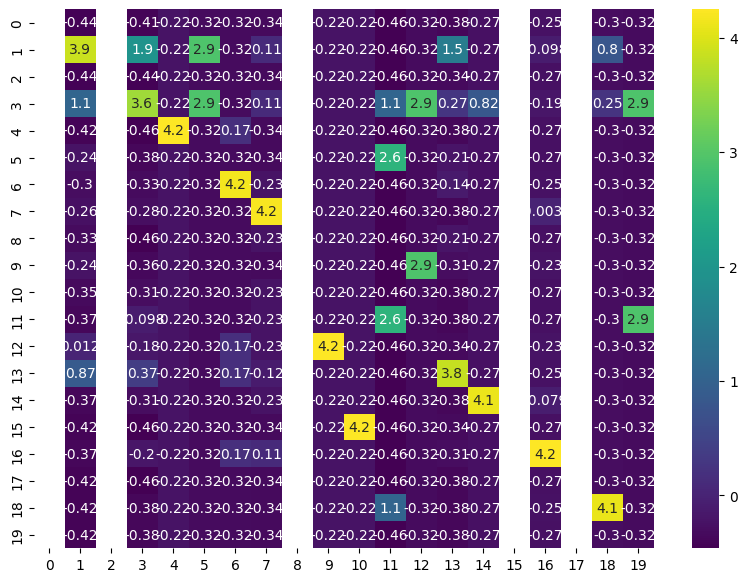

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')